In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/金融大數據/LSTM/AAPL.csv', index_col=0)
df2 = df
df = df.drop(['Volume','Adj Close'], axis=1)
df

,Open,High,Low,Close
Date,,,,
2021-08-04,147.270004,147.789993,146.279999,146.949997
2021-08-05,146.979996,147.839996,146.169998,147.059998
2021-08-06,146.350006,147.110001,145.630005,146.139999
2021-08-09,146.199997,146.699997,145.520004,146.089996
2021-08-10,146.440002,147.710007,145.300003,145.600006
...,...,...,...,...
2022-07-29,161.240005,163.630005,159.500000,162.509995
2022-08-01,161.009995,163.589996,160.889999,161.509995
2022-08-02,160.100006,162.410004,159.630005,160.009995


In [14]:
#min-max縮放
highest_price = df["High"].max()
lowest_price = df["Low"].min()

for col in ['Open','High','Low','Close']:
        df[col] = (df[col] - lowest_price)/(highest_price-lowest_price)
df

,Open,High,Low,Close
Date,,,,
2021-08-04,0.338219,0.347866,0.319852,0.332282
2021-08-05,0.332839,0.348794,0.317811,0.334323
2021-08-06,0.321150,0.335251,0.307792,0.317254
2021-08-09,0.318367,0.327644,0.305752,0.316327
2021-08-10,0.322820,0.346382,0.301670,0.307236
...,...,...,...,...
2022-07-29,0.597403,0.641744,0.565121,0.620965
2022-08-01,0.593135,0.641002,0.590909,0.602412
2022-08-02,0.576252,0.619110,0.567533,0.574583


In [38]:
y = []
for i in range(20, len(df2)):
  close = np.asarray(df2['Close'][i])
  close1 = np.asarray(df2['Close'][i-1])
  change = close - close1
  if change>0:
    change = 1 #漲
  else:
    change = 0 #跌
  y.append(change)
  y1 = np.asarray(y)
print(len(y1), type(y1), y1.shape, y1)

233 <class 'numpy.ndarray'> (233,) [1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 0 0 1 1 1 0 0 1 0]


In [39]:
x=[]
step=20
for i in range(0,len(df)-step):
  x.append(df.iloc[i:i+step,:].values)
x = np.array(x)
print(x, x.shape)

[[[0.33821907 0.34786636 0.31985163 0.33228202]
  [0.33283859 0.34879406 0.3178108  0.33432286]
  [0.32115047 0.33525056 0.30779238 0.31725423]
  ...
  [0.34211503 0.36567725 0.33005577 0.36289443]
  [0.37031547 0.45361796 0.36307987 0.44675321]
  [0.43821905 0.44081644 0.41280142 0.42282013]]

 [[0.33283859 0.34879406 0.3178108  0.33432286]
  [0.32115047 0.33525056 0.30779238 0.31725423]
  [0.31836737 0.3276438  0.30575154 0.31632653]
  ...
  [0.37031547 0.45361796 0.36307987 0.44675321]
  [0.43821905 0.44081644 0.41280142 0.42282013]
  [0.44137301 0.48126157 0.43228199 0.43543596]]

 [[0.32115047 0.33525056 0.30779238 0.31725423]
  [0.31836737 0.3276438  0.30575154 0.31632653]
  [0.32282015 0.34638239 0.30166989 0.30723581]
  ...
  [0.43821905 0.44081644 0.41280142 0.42282013]
  [0.44137301 0.48126157 0.43228199 0.43543596]
  [0.46066786 0.47643792 0.43339512 0.45658621]]

 ...

 [[0.16196678 0.23320976 0.14638216 0.23228206]
  [0.2283861  0.27977736 0.22337675 0.25751396]
  [0.26437

In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=100)
print(x_train.shape, y_train.shape)

(186, 20, 4) (186,)


In [74]:
import keras
from tensorflow.keras import layers, Model
from keras.layers import Dense, LSTM, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

input = layers.Input(shape=(20,4), name='lstm_input')
s = layers.LSTM(units=32,activation='relu',return_sequences=True, name='lstm1')(input)
s = layers.Dropout(0.4,name='lstm_dropout1')(s)
#s = layers.LSTM(units=64,activation='relu',return_sequences=True, name='lstm2')(input)
#s = layers.Dropout(0.3,name='lstm_dropout2')(s)
s = layers.LSTM(units=16,activation='relu',name='lstm3')(s)
s = layers.Dropout(0.4,name='lstm_dropout3')(s)
s = layers.Dense(2,name='dense1', activation='relu')(s)
close_price_change = layers.Dense(1,activation='linear',name='dense2')(s)
LSTM_model = Model(input, close_price_change, name='LSTM_model')
adam = Adam(learning_rate=0.01)
LSTM_model.compile(optimizer='adam',loss=['mse','mse'])
LSTM_model.summary()
history = LSTM_model.fit(x=x_train, y=y_train, validation_split=0.2, shuffle=True, epochs=100, batch_size=16, verbose=1)  


Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_input (InputLayer)     [(None, 20, 4)]           0         
                                                                 
 lstm1 (LSTM)                (None, 20, 32)            4736      
                                                                 
 lstm_dropout1 (Dropout)     (None, 20, 32)            0         
                                                                 
 lstm3 (LSTM)                (None, 16)                3136      
                                                                 
 lstm_dropout3 (Dropout)     (None, 16)                0         
                                                                 
 dense1 (Dense)              (None, 2)                 34        
                                                                 
 dense2 (Dense)              (None, 1)                 3

In [75]:
LSTM_model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2618


0.26179933547973633

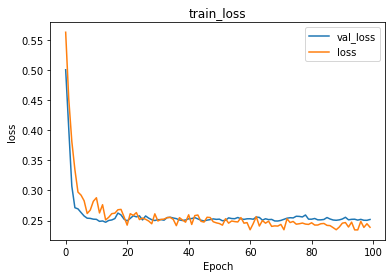

In [76]:
import matplotlib.pyplot as plt
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history["loss"], label='loss')
plt.legend()